In [46]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('canada_per_capita_income.csv')
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


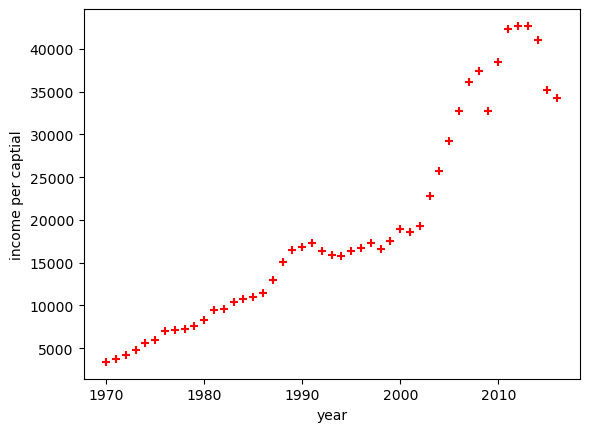

In [48]:
plt.scatter(df.year,df['per capita income (US$)'], color ='red',marker='+')
plt.xlabel('year')
plt.ylabel('income per captial')
plt.show()

In [49]:
new_df = df.drop('per capita income (US$)', axis='columns')
new_df.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [50]:
income_per_capital = df['per capita income (US$)']
income_per_capital.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: per capita income (US$), dtype: float64

In [51]:
# create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,income_per_capital)

LinearRegression()

## predict income in specific year

In [52]:
pred = reg.predict([[2002]])

/home/vel/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [53]:
pred

array([26376.32274041])

In [54]:
reg.coef_

array([828.46507522])

In [55]:
reg.intercept_

-1632210.7578554575

Y = m *X + b (m is coefficient and b is intercept)

In [56]:
2002*828.46507522 + -1632210.7578554575

26376.322734982474

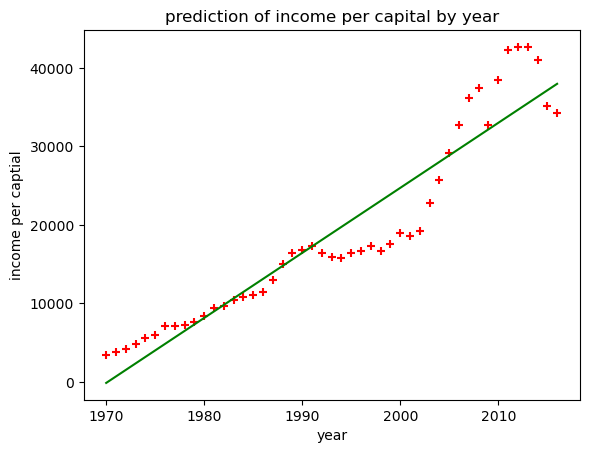

In [57]:
plt.title('prediction of income per capital by year')
plt.scatter(new_df, income_per_capital, color ='r',marker='+')
plt.plot(new_df, reg.predict(new_df), color ='green')
plt.xlabel('year')
plt.ylabel('income per captial')
plt.show()

# Generate csv file with list predicted income per capital specific year

In [74]:
year_df = pd.read_csv('year.csv')
year_df.head()

,year
0,2017
1,2018
2,2019
3,2020
4,2021


In [75]:
type(year_df)

pandas.core.frame.DataFrame

In [70]:
pred_income_by_year_df = reg.predict(year_df)
pred_income_by_year_df

array([38803.29886875, 39631.76394397, 40460.22901919, 41288.69409442,
       42117.15916964, 42945.62424486, 43774.08932009, 44602.55439531,
       45431.01947053, 46259.48454575, 47087.94962098, 47916.4146962 ,
       48744.87977142, 49573.34484664])

In [77]:
year_df['predicted income'] = pred_income_by_year_df
year_df

,year,predicted income
0,2017,38803.298869
1,2018,39631.763944
2,2019,40460.229019
3,2020,41288.694094
4,2021,42117.159170
5,2022,42945.624245
6,2023,43774.089320
7,2024,44602.554395
8,2025,45431.019471
9,2026,46259.484546


In [78]:
year_df.to_csv('predicted_income_by_years.csv')
print(f'saved a predicted_income_by_years.csv')

saved a predicted_income_by_years.csv
